<a href="https://colab.research.google.com/github/antonionipo/Iniciando-Analise-de-Dados/blob/main/RID196075_Desafio04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 4 - Construindo um modelo de Regressão para marketing

## **Contexto**

Uma empresa está investindo mensalmente em plataformas de publicidade online, como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas interessadas em seus produtos). A fim de acompanhar o desempenho desses investimentos, a empresa registra todos os gastos com publicidade e todos os retornos de vendas gerados a partir desses investimentos.

Para **entender** melhor **a relação entre as variáveis** presentes nesses registros e **identificar os fatores que mais impactam** na geração de leads, a empresa solicitou a análise de um especialista em dados. **Além disso, a empresa busca criar um modelo de predição** de valores para estimar o retorno de vendas que pode ser gerado a partir de um determinado investimento em publicidade.

Importar bibliotecas

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## **Análise Descritiva**

Esta etapa consiste em explorar os dados do dataset para **compreender melhor as variáveis e identificar problemas**. Para isso, é recomendado utilizar a biblioteca **Pandas** para importar e manipular os dados e realizar cálculos estatísticos, além das bibliotecas de visualização.

É importante investigar o tipo de dado em cada variável, os valores e a distribuição dos dados. Ao final, espera-se ter uma interpretação sólida dos dados para avançar para a próxima etapa.

Importar dados


In [130]:
df = pd.read_csv("MKT.csv")
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [132]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


## **Análise Exploratória**

Neta etapa iremos explorar mais a fundo os dados, **identificando relações entre as variáveis e descobrindo padrões relevantes.** Para isso, utilize técnicas de visualização de dados e análises estatísticas, buscando possíveis correlações e identificando possíveis outliers ou desvios da normalidade.

<aside>
💡 **Dica:** Análise a correlação dos dados e a distribuição dos mesmos

</aside>

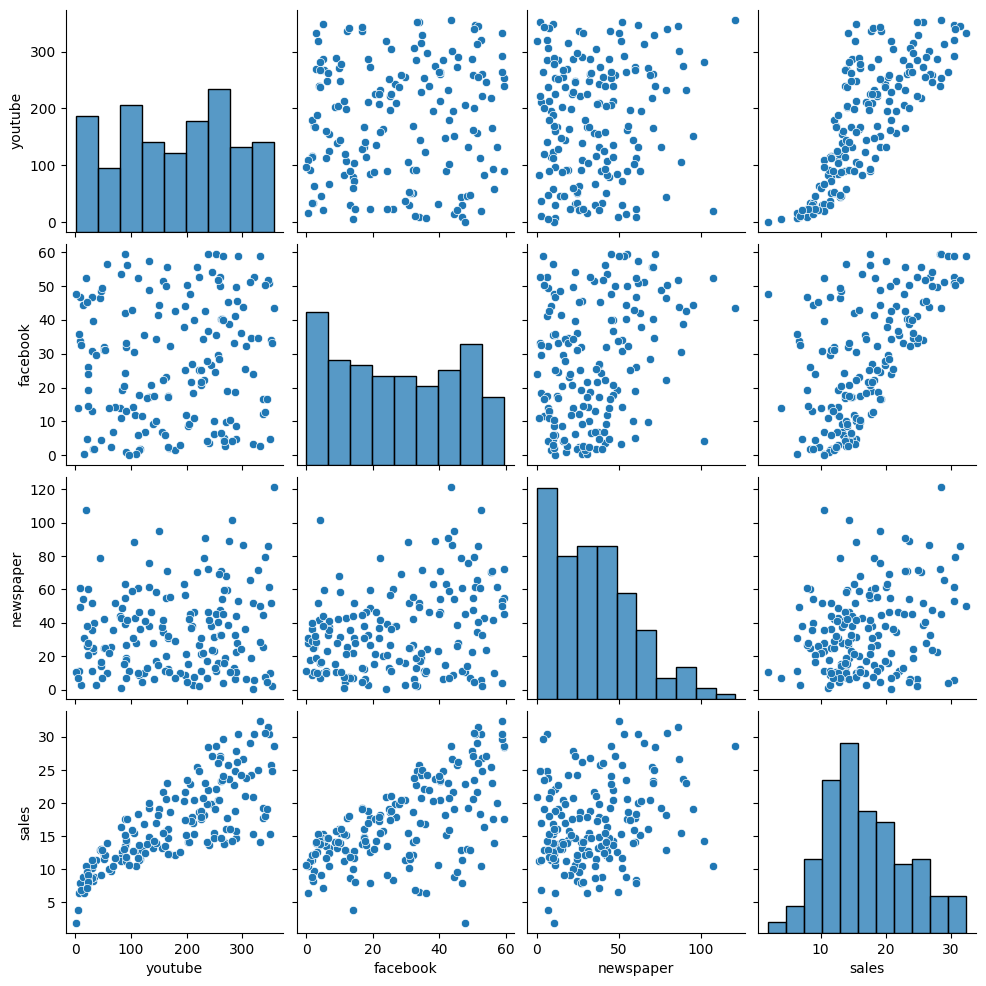

In [133]:
sns.pairplot(df)

<Axes: >

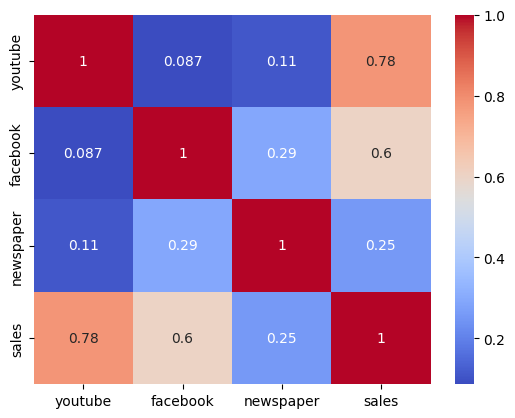

In [134]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## **Modelagem**

Para esta etapa, deve-se **construir um modelo** simples de **regressão** que permita a previsão solicitada pela empresa, com base nos dados disponíveis. Para isto, importe as bibliotecas necessárias e carregue os conjuntos de dados para iniciar a sua construção!

<aside>
💡 **Dica:** Utilize as técnicas ensinadas para a criação de um modelo de regressão simples utilizando a biblioteca sklearn.

</aside>

In [135]:
X = df[['youtube', 'facebook', 'newspaper']]
Y = df[["sales"]]

X_y = df[['youtube']]
X_f = df[['facebook']]
X_n = df[['newspaper']]

In [136]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, test_size = 0.25, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(128, 3)
(43, 3)
(128, 1)
(43, 1)


In [137]:
Xy_train, Xy_test, Yy_train, Yy_test = train_test_split(X_y, Y, train_size = 0.75, test_size = 0.25, random_state = 1)
Xf_train, Xf_test, Yf_train, Yf_test = train_test_split(X_f, Y, train_size = 0.75, test_size = 0.25, random_state = 1)
Xn_train, Xn_test, Yn_train, Yn_test = train_test_split(X_n, Y, train_size = 0.75, test_size = 0.25, random_state = 1)

In [138]:
model = LinearRegression().fit(X_train, Y_train)
model_y = LinearRegression().fit(Xy_train, Yy_train)
model_f = LinearRegression().fit(Xf_train, Yf_train)
model_n = LinearRegression().fit(Xn_train, Yn_train)

## **Calculando predição**

Para concluirmos a demanda solicitada pela empresa, iremos **aplicar o modelo de regressão construído** nas etapas anteriores **para realizar as previsões** de retorno de vendas que pode ser gerado a partir de um determinado investimento em publicidade e assim, poderemos apresentá-lo a empresa.

Através dessas previsões, poderemos avaliar o impacto dos diferentes níveis de investimento em marketing nas vendas, auxiliando na tomada de decisões e na definição de estratégias de negócio.

In [139]:
y_pred = model.predict(X_test)
y_pred_y = model_y.predict(Xy_test)
y_pred_f = model_f.predict(Xf_test)
y_pred_n = model_n.predict(Xn_test)

In [140]:
r2 = r2_score(Y_test, y_pred)
print(f'R2 Score: {round(r2,4)}')
mae = mean_squared_error(Y_test, y_pred)
print(f'Mean Squared Error: {round(mae,4)}')

R2 Score: 0.9087
Mean Squared Error: 3.4584


In [141]:
r2_y = r2_score(Yy_test, y_pred_y)
mae_y = mean_squared_error(Yy_test, y_pred_y)
r2_f = r2_score(Yf_test, y_pred_f)
mae_f = mean_squared_error(Yf_test, y_pred_f)
r2_n = r2_score(Yn_test, y_pred_n)
mae_n = mean_squared_error(Yn_test, y_pred_n)
print(f'R2 Score Youtube: {round(r2_y, 4)}')
print(f'R2 Score Facebook: {round(r2_f, 4)}')
print(f'R2 Score Newspaper: {round(r2_n, 4)}')

R2 Score Youtube: 0.5987
R2 Score Facebook: 0.3569
R2 Score Newspaper: -0.1228


Text(0, 0.5, 'Sales')

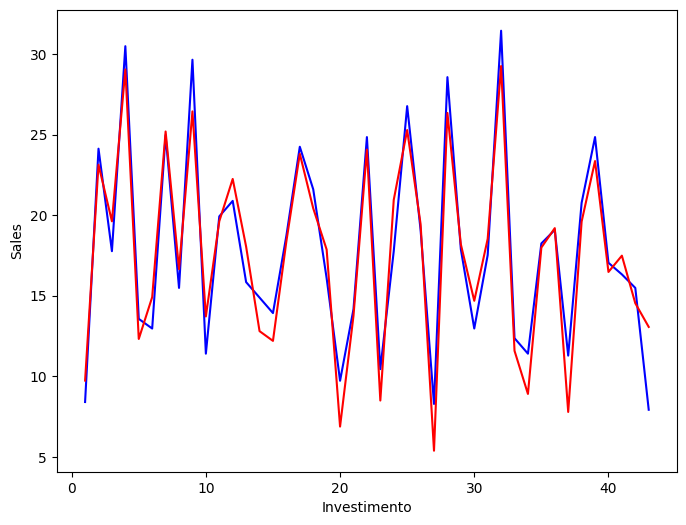

In [142]:
c = [i for i in range(1, len(Y_test)+1, 1)]
fig = plt.figure(figsize=(8,6))
plt.plot(c, Y_test, color="blue")
plt.plot(c, y_pred, color = "red")
plt.xlabel("Investimento")
plt.ylabel("Sales")

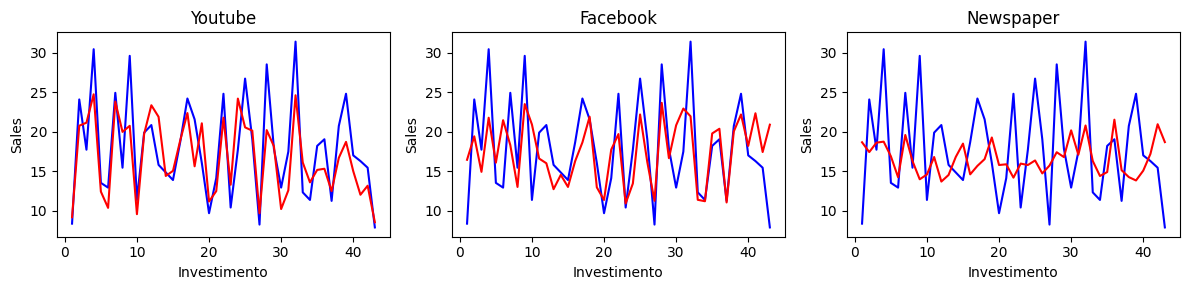

In [143]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].plot(c, Yy_test, color='blue')
axes[0].plot(c, y_pred_y, color='red')
axes[0].set_xlabel('Investimento')
axes[0].set_ylabel('Sales')
axes[0].set_title("Youtube")
axes[1].plot(c, Yf_test, color='blue')
axes[1].plot(c, y_pred_f, color='red')
axes[1].set_xlabel('Investimento')
axes[1].set_ylabel('Sales')
axes[1].set_title("Facebook")
axes[2].plot(c, Yn_test, color='blue')
axes[2].plot(c, y_pred_n, color='red')
axes[2].set_xlabel('Investimento')
axes[2].set_ylabel('Sales')
axes[2].set_title("Newspaper")
plt.tight_layout()
plt.show()